# Introduction to Data Manipulation III
* source: Johns Hopkins COVID-19 time series data
* in grateful appreciation of prasertcbs youtube channel

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:,.2f}'.format)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url_confirm = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_recover = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

df_confirm = pd.read_csv(url_confirm)
df_death = pd.read_csv(url_death)
df_recover = pd.read_csv(url_recover)

print(df_confirm.shape)
print(df_death.shape)
print(df_recover.shape)

(266, 194)
(266, 194)
(253, 194)


In [3]:
df_confirm = df_confirm.groupby('Country/Region').sum()
df_confirm.reset_index(drop=False, inplace=True)

In [4]:
df_recover = df_recover.groupby('Country/Region').sum()
df_recover.reset_index(drop=False, inplace=True)

In [5]:
df_death = df_death.groupby('Country/Region').sum()
df_death.reset_index(drop=False, inplace=True)

In [6]:
df_confirm['Status'] = 'confirmed'
df_death['Status'] = 'deaths'
df_recover['Status'] = 'recovered'

In [7]:
df_confirm = pd.melt(df_confirm, id_vars=['Country/Region', 'Lat', 'Long', 'Status'], var_name='Date', value_name='Confirmed')
df_death = pd.melt(df_death, id_vars=['Country/Region', 'Lat', 'Long', 'Status'], var_name='Date', value_name='Deaths')
df_recover = pd.melt(df_recover, id_vars=['Country/Region', 'Lat', 'Long', 'Status'], var_name='Date', value_name='Recovered')

print(df_confirm[(df_confirm['Country/Region']=='Afghanistan') & (df_confirm['Date']=='6/27/20')])
print(df_death[(df_death['Country/Region']=='Afghanistan') & (df_death['Date']=='6/27/20')])
print(df_recover[(df_recover['Country/Region']=='Afghanistan') & (df_recover['Date']=='6/27/20')])

      Country/Region   Lat  Long     Status     Date  Confirmed
29516    Afghanistan 33.94 67.71  confirmed  6/27/20      30616
      Country/Region   Lat  Long  Status     Date  Deaths
29516    Afghanistan 33.94 67.71  deaths  6/27/20     703
      Country/Region   Lat  Long     Status     Date  Recovered
29516    Afghanistan 33.94 67.71  recovered  6/27/20      10674


In [8]:
df = pd.concat([df_confirm, df_death, df_recover], axis=1)
df.head(3)

,Country/Region,Lat,Long,Status,Date,Confirmed,Country/Region,Lat,Long,Status,Date,Deaths,Country/Region,Lat,Long,Status,Date,Recovered
0,Afghanistan,33.94,67.71,confirmed,1/22/20,0,Afghanistan,33.94,67.71,deaths,1/22/20,0,Afghanistan,33.94,67.71,recovered,1/22/20,0
1,Albania,41.15,20.17,confirmed,1/22/20,0,Albania,41.15,20.17,deaths,1/22/20,0,Albania,41.15,20.17,recovered,1/22/20,0
2,Algeria,28.03,1.66,confirmed,1/22/20,0,Algeria,28.03,1.66,deaths,1/22/20,0,Algeria,28.03,1.66,recovered,1/22/20,0


In [9]:
df.columns

Index(['Country/Region', 'Lat', 'Long', 'Status', 'Date', 'Confirmed',
       'Country/Region', 'Lat', 'Long', 'Status', 'Date', 'Deaths',
       'Country/Region', 'Lat', 'Long', 'Status', 'Date', 'Recovered'],
      dtype='object')

In [10]:
df = df.loc[:, ~df.columns.duplicated()]
df.tail()

,Country/Region,Lat,Long,Status,Date,Confirmed,Deaths,Recovered
35715,West Bank and Gaza,31.95,35.23,confirmed,7/29/20,11284,80,4833
35716,Western Sahara,24.22,-12.89,confirmed,7/29/20,10,1,8
35717,Yemen,15.55,48.52,confirmed,7/29/20,1711,485,849
35718,Zambia,-13.13,27.85,confirmed,7/29/20,5249,146,3285
35719,Zimbabwe,-19.02,29.15,confirmed,7/29/20,2879,41,887


In [11]:
df.drop(columns=['Status', 'Lat', 'Long'], inplace=True)
df.head()

,Country/Region,Date,Confirmed,Deaths,Recovered
0,Afghanistan,1/22/20,0,0,0
1,Albania,1/22/20,0,0,0
2,Algeria,1/22/20,0,0,0
3,Andorra,1/22/20,0,0,0
4,Angola,1/22/20,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35720 entries, 0 to 35719
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  35720 non-null  object
 1   Date            35720 non-null  object
 2   Confirmed       35720 non-null  int64 
 3   Deaths          35720 non-null  int64 
 4   Recovered       35720 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.4+ MB


In [13]:
df['Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35720 entries, 0 to 35719
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  35720 non-null  object        
 1   Date            35720 non-null  datetime64[ns]
 2   Confirmed       35720 non-null  int64         
 3   Deaths          35720 non-null  int64         
 4   Recovered       35720 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.4+ MB


In [14]:
df.sort_values(['Country/Region', 'Date'], inplace=True)
df

,Country/Region,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
188,Afghanistan,2020-01-23,0,0,0
376,Afghanistan,2020-01-24,0,0,0
564,Afghanistan,2020-01-25,0,0,0
752,Afghanistan,2020-01-26,0,0,0
...,...,...,...,...,...
34967,Zimbabwe,2020-07-25,2434,34,518
35155,Zimbabwe,2020-07-26,2512,34,518
35343,Zimbabwe,2020-07-27,2704,36,542
35531,Zimbabwe,2020-07-28,2817,40,604


In [15]:
df.reset_index(drop=True, inplace=True)
df

,Country/Region,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0
...,...,...,...,...,...
35715,Zimbabwe,2020-07-25,2434,34,518
35716,Zimbabwe,2020-07-26,2512,34,518
35717,Zimbabwe,2020-07-27,2704,36,542
35718,Zimbabwe,2020-07-28,2817,40,604


In [16]:
df[df['Country/Region']=='Thailand']

,Country/Region,Date,Confirmed,Deaths,Recovered
31920,Thailand,2020-01-22,2,0,0
31921,Thailand,2020-01-23,3,0,0
31922,Thailand,2020-01-24,5,0,0
31923,Thailand,2020-01-25,7,0,0
31924,Thailand,2020-01-26,8,0,2
...,...,...,...,...,...
32105,Thailand,2020-07-25,3282,58,3109
32106,Thailand,2020-07-26,3291,58,3109
32107,Thailand,2020-07-27,3297,58,3111
32108,Thailand,2020-07-28,3297,58,3111


### Final dataframe

In [17]:
covid = df.groupby(['Country/Region', 'Date']).sum()[['Confirmed', 'Deaths', 'Recovered']]
covid

Confirmed  Deaths  Recovered
Country/Region Date                                    
Afghanistan    2020-01-22          0       0          0
               2020-01-23          0       0          0
               2020-01-24          0       0          0
               2020-01-25          0       0          0
               2020-01-26          0       0          0
...                              ...     ...        ...
Zimbabwe       2020-07-25       2434      34        518
               2020-07-26       2512      34        518
               2020-07-27       2704      36        542
               2020-07-28       2817      40        604
               2020-07-29       2879      41        887

[35720 rows x 3 columns]

In [18]:
covid.reset_index(inplace=True)
covid

,Country/Region,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0
...,...,...,...,...,...
35715,Zimbabwe,2020-07-25,2434,34,518
35716,Zimbabwe,2020-07-26,2512,34,518
35717,Zimbabwe,2020-07-27,2704,36,542
35718,Zimbabwe,2020-07-28,2817,40,604


In [19]:
covid[covid['Country/Region']=='Thailand']

,Country/Region,Date,Confirmed,Deaths,Recovered
31920,Thailand,2020-01-22,2,0,0
31921,Thailand,2020-01-23,3,0,0
31922,Thailand,2020-01-24,5,0,0
31923,Thailand,2020-01-25,7,0,0
31924,Thailand,2020-01-26,8,0,2
...,...,...,...,...,...
32105,Thailand,2020-07-25,3282,58,3109
32106,Thailand,2020-07-26,3291,58,3109
32107,Thailand,2020-07-27,3297,58,3111
32108,Thailand,2020-07-28,3297,58,3111


### Some useful visualizations

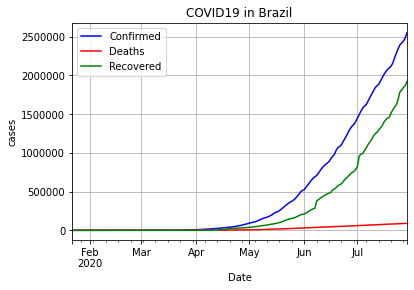

In [20]:
country = 'Brazil'
g = covid[covid['Country/Region']==country]
g[['Date', 'Confirmed', 'Deaths', 'Recovered']].set_index('Date').plot(figsize=(6,4), 
                                                                           color=['blue', 'red', 'green'], 
                                                                           title='COVID19 in {}'.format(country), 
                                                                           grid=True);
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('cases');

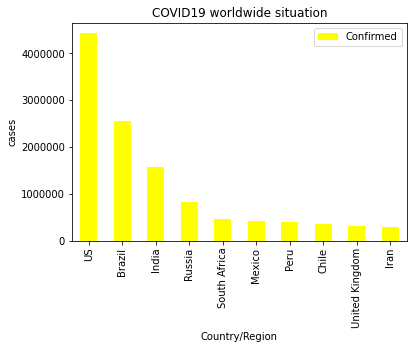

In [21]:
f = df.groupby(['Country/Region']).max()[['Confirmed', 'Deaths', 'Recovered']]
f.reset_index(drop=False, inplace=True)
f.sort_values(by='Confirmed', ascending=False, inplace=True)
f.iloc[:10,:2].set_index('Country/Region').plot(kind='bar', figsize=(6,4), color=['yellow'], title='COVID19 worldwide situation', );
plt.ylabel('cases')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

### กราฟนี้มีอะไรผิดพลาด???

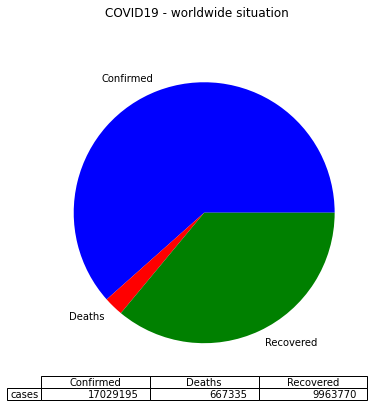

In [22]:
g = pd.DataFrame(f[['Confirmed', 'Deaths', 'Recovered']].sum(), columns=['cases'])
g.plot(kind='pie',
       colors=['blue', 'red', 'green'],
       subplots=True, 
       figsize=(8,6), 
       title='COVID19 - worldwide situation', 
       table=True,
       legend=False);
plt.ylabel('');